In [26]:
#Project: LAP technologies preparatives
#
#Dataset : https://www.kaggle.com/yunlevin/levin-vehicle-telematics/kernels?sortBy=date&group=upvoted&pageSize=20&datasetId=10553
#

import math
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Import part of the dataset

directory = "/home/andres/Dropbox/LAP_project/Routines/lap_technologies/test_set/"

os.chdir(directory)

#Load  until the car 4 only

trucks = pd.read_csv('allcars.csv',nrows = 2500000)

In [3]:
# Observations and columns
trucks.shape

(2500000, 18)

In [4]:
# View the columns
trucks.columns

Index(['Unnamed: 0', 'timeStamp', 'tripID', 'accData', 'gps_speed', 'battery',
       'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed',
       'tAdv', 'tPos', 'deviceID'],
      dtype='object')

In [5]:
trucks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195000 entries, 0 to 1194999
Data columns (total 18 columns):
Unnamed: 0    1195000 non-null int64
timeStamp     1195000 non-null object
tripID        1195000 non-null int64
accData       1195000 non-null object
gps_speed     1073356 non-null float64
battery       1073356 non-null float64
cTemp         106460 non-null float64
dtc           106460 non-null float64
eLoad         1073356 non-null float64
iat           106460 non-null float64
imap          106460 non-null float64
kpl           1073356 non-null float64
maf           1073356 non-null float64
rpm           1073356 non-null float64
speed         1195000 non-null float64
tAdv          106460 non-null float64
tPos          1073356 non-null float64
deviceID      1195000 non-null int64
dtypes: float64(13), int64(3), object(2)
memory usage: 164.1+ MB


In [5]:
#A glimpse of the dataset
trucks.describe()

,Unnamed: 0,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,2.500000e+06,2.500000e+06,1.600244e+06,1.600244e+06,255819.000000,255819.000000,1.600244e+06,255819.000000,255819.000000,1.600244e+06,1.600244e+06,1.600244e+06,2.500000e+06,255819.000000,1.600244e+06,2.500000e+06
mean,2.943226e+05,1.338327e+02,6.675090e+00,3.275436e+01,175.574410,148.880830,5.424561e+01,161.832737,189.015589,1.190456e+01,2.957113e+01,1.098437e+03,3.430818e+01,148.880830,3.205406e+01,8.699874e+00
std,2.699527e+05,1.029529e+02,1.296459e+01,7.151164e+01,95.932656,125.694757,6.719329e+01,110.823198,83.912060,1.089646e+01,7.273228e+01,6.188649e+02,5.975232e+01,125.694757,7.279960e+01,5.404484e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000e+00
25%,6.671100e+04,5.400000e+01,0.000000e+00,1.248000e+01,81.000000,0.000000,2.901961e+01,38.000000,101.000000,3.021000e+00,5.540000e+00,9.250000e+02,0.000000e+00,0.000000,5.882353e+00,4.000000e+00
50%,1.825220e+05,1.360000e+02,0.000000e+00,1.288000e+01,255.000000,255.000000,2.901961e+01,255.000000,255.000000,1.800596e+01,6.040000e+00,1.200000e+03,2.400000e+01,255.000000,5.882353e+00,5.000000e+00
75%,4.950220e+05,1.710000e+02,7.800000e+00,1.288000e+01,255.000000,255.000000,4.666667e+01,255.000000,255.000000,1.800596e+01,6.960000e+00,1.200000e+03,3.600000e+01,255.000000,1.490196e+01,1.500000e+01
max,9.692090e+05,4.080000e+02,2.313100e+02,2.550000e+02,255.000000,255.000000,2.550000e+02,255.000000,255.000000,1.095112e+03,5.939900e+02,1.484975e+04,2.550000e+02,255.000000,2.550000e+02,1.600000e+01


In [6]:
#Split the dataset for truck 1 & truck 2

df4 = trucks.loc[trucks['deviceID'] == 4]
df4.describe()

,Unnamed: 0,tripID,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
count,969210.000000,969210.000000,849422.000000,849422.000000,0.0,0.0,849422.000000,0.0,0.0,849422.000000,849422.000000,849422.000000,969210.000000,0.0,849422.000000,969210.0
mean,484604.500000,121.888968,1.373801,12.623644,NaN,NaN,29.298062,NaN,NaN,17.050136,6.201447,1181.691034,30.433420,NaN,6.022315,4.0
std,279786.971538,45.103573,4.780108,1.720864,NaN,NaN,7.108888,NaN,NaN,7.025711,5.363805,235.692241,13.579001,NaN,2.821012,0.0
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,4.0
25%,242302.250000,121.000000,0.000000,12.880000,NaN,NaN,29.019608,NaN,NaN,18.005960,6.040000,1200.000000,36.000000,NaN,5.882353,4.0
50%,484604.500000,136.000000,0.000000,12.880000,NaN,NaN,29.019608,NaN,NaN,18.005960,6.040000,1200.000000,36.000000,NaN,5.882353,4.0
75%,726906.750000,138.000000,0.000000,12.880000,NaN,NaN,29.019608,NaN,NaN,18.005960,6.040000,1200.000000,36.000000,NaN,5.882353,4.0
max,969209.000000,228.000000,84.600000,59.399000,NaN,NaN,98.823529,NaN,NaN,1095.112500,593.990000,14849.750000,232.000000,NaN,90.980392,4.0


In [23]:
# Get data for individual Trips
# Selected_trip : Id of a particular trip

selected_trip = 10

for tripID in set(df4['tripID'].values):
    df_trip = df4[df4['tripID']==10]

In [24]:
df_trip.head()

,Unnamed: 0,timeStamp,tripID,accData,gps_speed,battery,cTemp,dtc,eLoad,iat,imap,kpl,maf,rpm,speed,tAdv,tPos,deviceID
282249,58315,2017-09-22 08:04:54.000000,10,0980fb700610ebf5bb1009d3120ec8f1f58f2924dbfbf7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,NaN,NaN,4
282250,58316,2017-09-22 08:04:55.000000,10,08f0fbb006380709d20c0dbd0811ab1621cb03ffae0006...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.8,NaN,NaN,4
282251,58317,2017-09-22 08:04:56.000000,10,0860fb7006900305d70508c3fbfbab060ccafffec21a0d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,NaN,NaN,4
282252,58318,2017-09-22 08:04:57.000000,10,08e8fbb8066803f9b3eee5930a01c10c0dc0fd06affe0c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,4
282253,58319,2017-09-22 08:04:58.000000,10,0898fbb00678edf3a40c0cda0302c10306c9ff07beff07...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.9,NaN,NaN,4


In [25]:
# ## Converting Raw ECompass data to engineering units

import numpy as np
# Convert Accelerometer reading to g units, 8bit data with a range of +-2g #
def convert_acc(x):
    x = int(x,16)
    if x>127:
        x = x-256
    return np.float64(x*2/128)

# Convert a single row of Accelerometer data to engineering units and return a df #
def convert_acc_row(row):
    # Initially the data was gathered without magnetometer, so check length for identification #
    data_list = []
    for i in range(0, len(row), 6):
        x = convert_acc(row[i:i+2])
        y = convert_acc(row[i+2:i+4])
        z = convert_acc(row[i+4:i+6])
        
        data_list.append([x,y,z])
    return pd.DataFrame(columns=['ax','ay','az'], data=data_list)

df_trip['accData'] = df_trip['accData'].apply(convert_acc_row)
# Drop the values for first second as the data is not collected completely #
df_trip = df_trip.reset_index(drop=True)
df_trip = df_trip.drop(0).reset_index(drop=True)




/home/andres/.local/lib/python3.5/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
# Initial exploration of the dataset:
# 
# Scatter matrix and correlation between features
# 


corr_matrix = df4.corr()

corr_matrix["rpm"].sort_values(ascending=False)


rpm           1.000000
eLoad         0.684523
battery       0.636753
speed         0.492980
tPos          0.460940
maf           0.307301
kpl           0.205570
gps_speed     0.184634
Unnamed: 0   -0.080889
tripID       -0.132561
cTemp              NaN
dtc                NaN
iat                NaN
imap               NaN
tAdv               NaN
deviceID           NaN
Name: rpm, dtype: float64

In [8]:
df4.columns

Index(['Unnamed: 0', 'timeStamp', 'tripID', 'accData', 'gps_speed', 'battery',
       'cTemp', 'dtc', 'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed',
       'tAdv', 'tPos', 'deviceID'],
      dtype='object')

In [9]:

# Replace zeros by NaN's for plotting with Seaborn

#df4 = df4.replace(0.0,np.nan)

attributes = ['gps_speed', 'battery', 'cTemp',
       'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tPos']

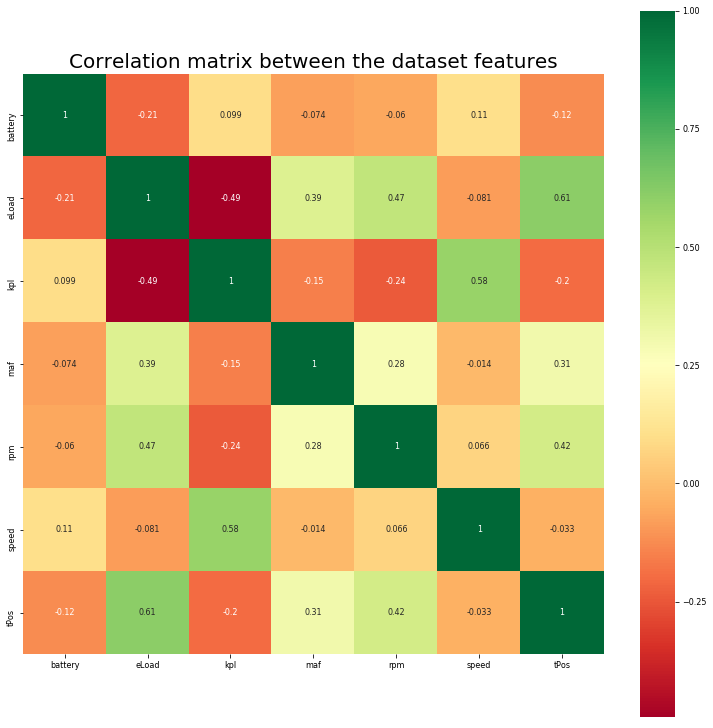

In [19]:
import seaborn as sns

correlation_matrix = df4.drop(['dtc', 'tAdv','accData','deviceID','Unnamed: 0', 'tripID', 'gps_speed', 'cTemp', 'iat', 'imap','timeStamp'], axis=1).corr()

plt.figure(figsize=(13,13))

plt.rcParams.update({'font.size': 8})
plt.rc('axes', titlesize = 20)
plt.rc('axes', labelsize = 10)
plt.rc('xtick', labelsize = 8)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 8)    # fontsize of the tick labels
plt.rc('legend', fontsize = 8)    # legend fontsize
plt.rc('figure', titlesize = 20)
ax = sns.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
plt.title('Correlation matrix between the dataset features')
plt.show()


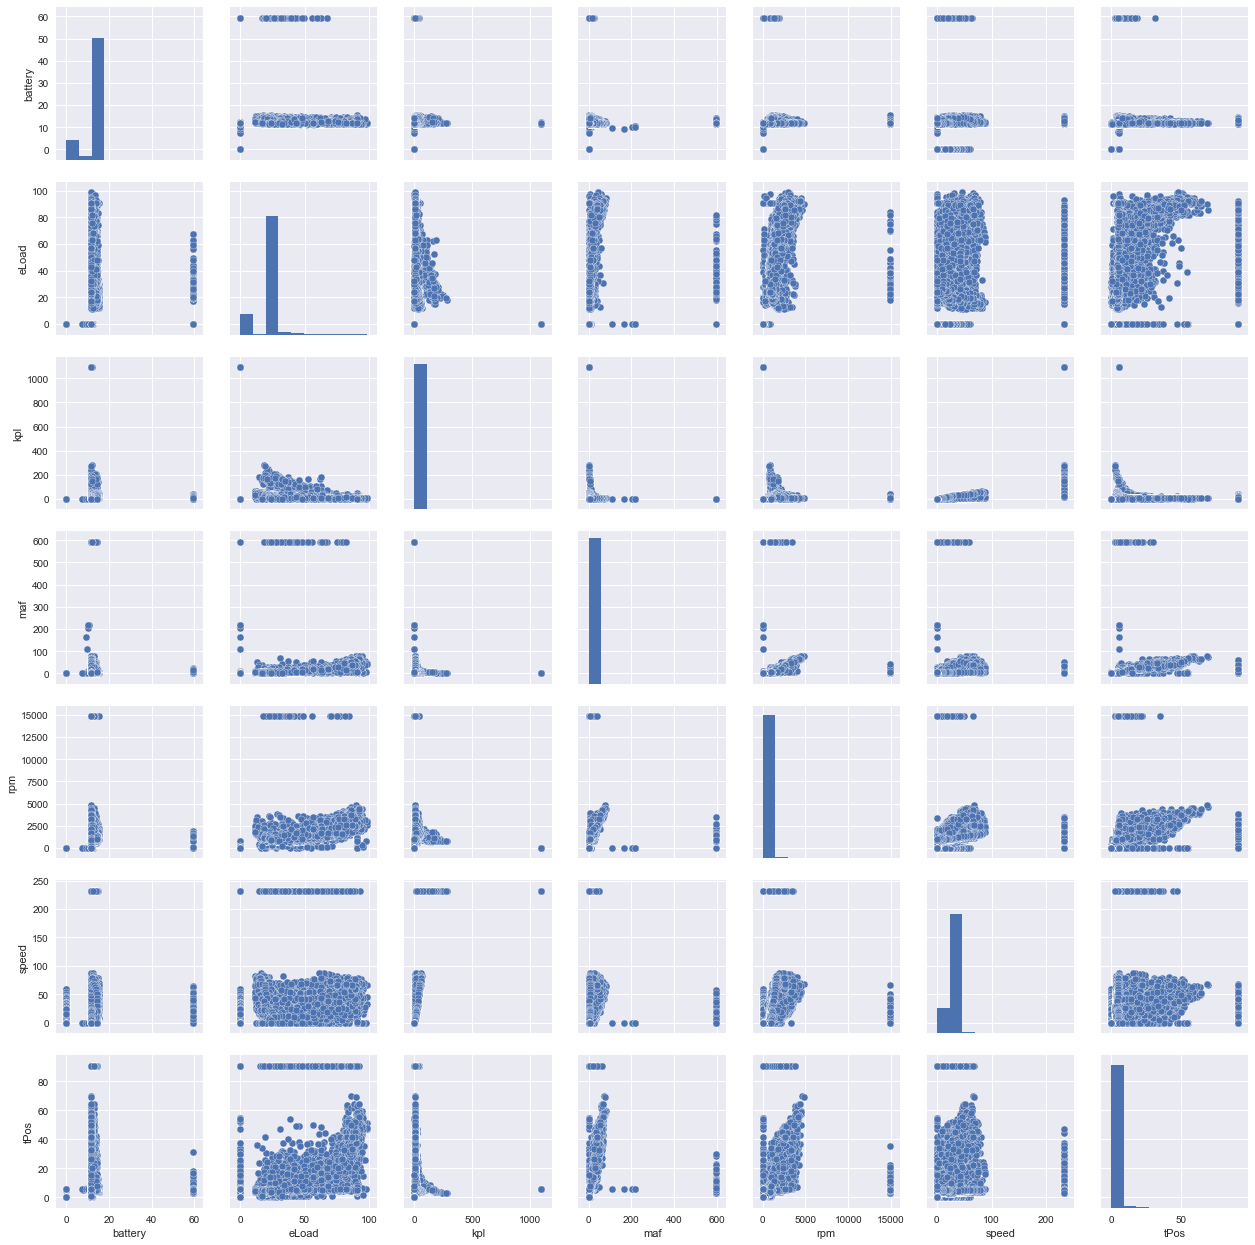

In [25]:
#save plot display settings to change back to when done plotting with seaborn

df4 = df4.replace(np.nan,0.0)


sns.set()
sns.pairplot(df4.drop(['dtc', 'tAdv','accData','deviceID',
                       'Unnamed: 0', 'tripID', 'gps_speed', 'cTemp', 'iat', 'imap','timeStamp'],axis=1))


In [13]:
#Time series analisis 

attributes = ['Unnamed: 0','gps_speed', 'battery', 'cTemp',
       'eLoad', 'iat', 'imap', 'kpl', 'maf', 'rpm', 'speed', 'tPos']


df4[attributes].describe()

,Unnamed: 0,gps_speed,battery,cTemp,eLoad,iat,imap,kpl,maf,rpm,speed,tPos
count,969209.000000,136112.000000,834934.000000,0.0,832642.000000,0.0,0.0,819841.000000,834973.000000,832628.000000,850245.000000,834953.000000
mean,484605.000000,8.573357,12.842693,NaN,29.888498,NaN,NaN,17.665328,6.308762,1205.525590,34.691618,6.126676
std,279786.682863,8.992802,0.446743,NaN,5.823013,NaN,NaN,6.346182,5.347078,167.146896,7.903469,2.730683
min,1.000000,0.000200,7.440000,NaN,11.372549,NaN,NaN,0.020344,0.640000,112.500000,0.100000,0.392157
25%,242303.000000,1.200000,12.880000,NaN,29.019608,NaN,NaN,18.005960,6.040000,1200.000000,36.000000,5.882353
50%,484605.000000,4.300000,12.880000,NaN,29.019608,NaN,NaN,18.005960,6.040000,1200.000000,36.000000,5.882353
75%,726907.000000,14.700000,12.880000,NaN,29.019608,NaN,NaN,18.005960,6.040000,1200.000000,36.000000,5.882353
max,969209.000000,84.600000,59.399000,NaN,98.823529,NaN,NaN,1095.112500,593.990000,14849.750000,232.000000,90.980392
